<a href="https://colab.research.google.com/github/Pushya26/codsoft/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [ ]:
#loading dataset into pandas dataframe
movie_data = pd.read_csv('C:\Users\pushy\Downloads\IMDb Movies India.csv\IMDb Movies India.csv', encoding='ISO-8859-1')

In [ ]:
#print first 5 rows
movie_data.head()

In [ ]:
#Print last 5 rows
movie_data.tail()


In [ ]:
movie_data.shape

In [ ]:
#information of dataset
movie_data.info()

In [ ]:
movie_data.describe()

In [ ]:
#check missing values
movie_data.isnull().sum()

Data Handling

In [ ]:
movie_data.columns

In [ ]:
genres = movie_data['Genre'].unique()
print("Genres:",genres)

In [ ]:
rating_distribution = movie_data['Rating'].value_counts()
print(rating_distribution)

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [ ]:
#dropping duplicate values and unwanted columns
movie_data.drop_duplicates(inplace = True)

In [ ]:
attributes = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
movie_data.dropna(subset = attributes, inplace= True)
movie_data.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [ ]:
movie_data[['Name', 'Rating']]

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6
...,...,...
15493,Zubaan,6.1
15494,Zubeidaa,6.2
15503,Zulm Ki Zanjeer,5.8
15505,Zulmi,4.5


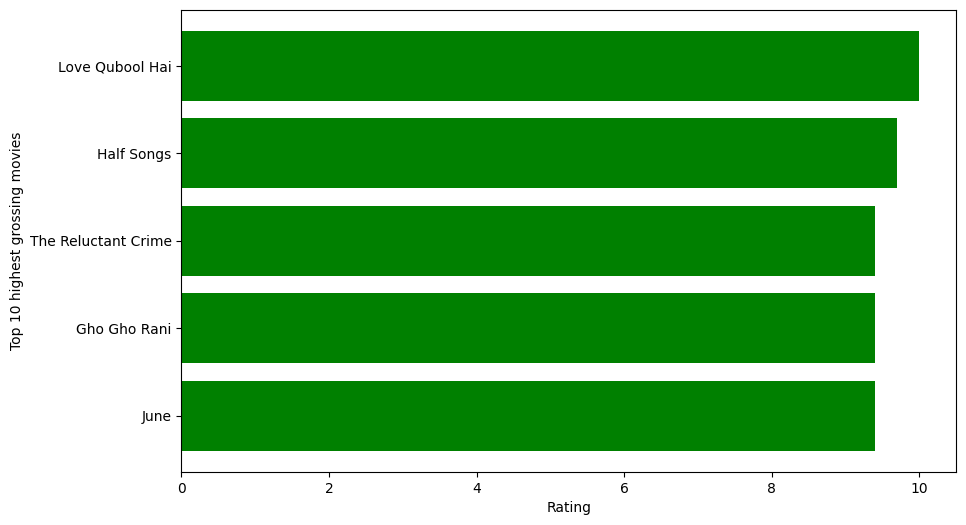

In [ ]:
top_rated_movies = movie_data.sort_values(by = 'Rating', ascending = False).head()
plt.figure(figsize = (10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'],color = 'green')
plt.xlabel('Rating')
plt.ylabel('Top 10 highest grossing movies')
plt.gca().invert_yaxis()
plt.show()


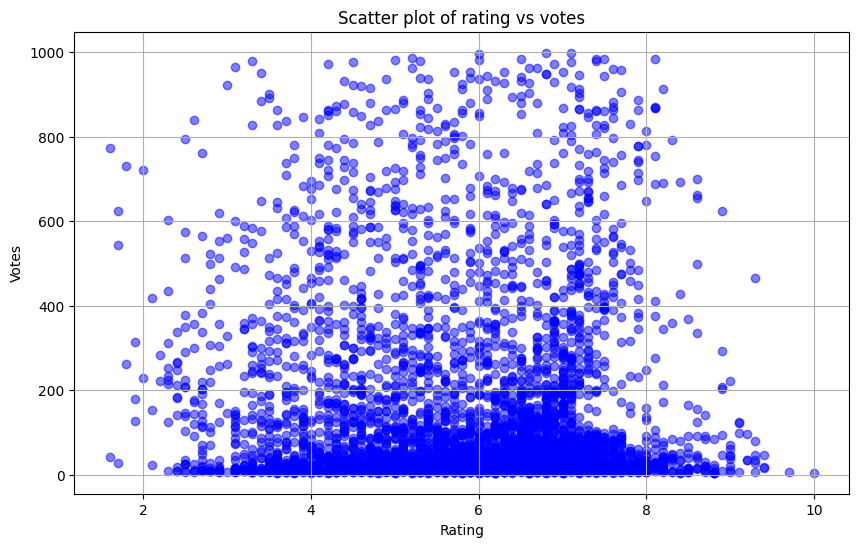

In [ ]:
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors = 'coerce')
plt.figure(figsize = (10,6))
plt.scatter(movie_data['Rating'],movie_data['Votes'],alpha = 0.5, color = 'b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter plot of rating vs votes')
plt.grid(True)
plt.show()

In [ ]:
actors = pd.concat([movie_data['Actor 1'], movie_data['Actor 2'], movie_data['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor' , 'Number of movies']
plt.figure(figsize = (12,6))
sns.barplot(x = 'Number of movies', y = 'Actor', data = actor_counts.head(10), palette = 'viridis')
plt.xlabel('Number of movies')
plt.ylabel('Actor')
plt.title('Top 10 actors by number of movies performed')
plt.show()

In [ ]:
columns_intrest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style = 'ticks')
sns.pairplot(movie_data[columns_intrest],diag_kind = 'kde', markers = 'o', palette = 'viridis', height =2.5, aspect = 1.2)
plt.suptitle('Pair plot of Voting, Rating, Duration and Year', y = 1.02)
plt.show()

correlation heatmap

In [ ]:
numerical_columns = ['Votes', 'Rating','Duration', 'Year']
correlation_matrix = movie_data[numerical_columns].corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show()

In [ ]:
  movie_data_sorted = movie_data.sort_values(by = 'Votes', ascending = False)
  movie_data_sorted['Vote_Count_Percentile'] = movie_data_sorted['Votes'].rank(pct = True) *100
  movie_data_sorted.reset_index(drop = True, inplace = True)
  print(movie_data_sorted[['Name', 'Votes', 'Vote_Count_Percentile']])

In [ ]:
movie_data.head()

In [ ]:
movie_data = movie_data.dropna(subset = ['Votes'])
movie_data.head()

In [ ]:
movie_data.isnull().sum()

Model Training and Testing

In [ ]:
movie_data['Year'] = movie_data['Year'].astype(str)
movie_data['Duration'] = movie_data['Duration'].astype(str)
movie_data['Year'] = movie_data['Year'].str.extract('(\d+)').astype(float)
movie_data['Duration'] = movie_data['Duration'].str.extract('(\d+)').astype(float)
X = movie_data[['Year', 'Duration', 'Votes']]
Y = movie_data['Rating']
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:

print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(4482, 3) (3585, 3) (897, 3)
(4482,) (3585,) (897,)


In [ ]:
model = LinearRegression()




In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation


Accuracy Score




In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)


[5.80737562 5.9145335  5.75013655 ... 5.48933211 5.60297571 5.12412883]


In [ ]:
Y_train_prediction = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_train_prediction)
rmse = mean_squared_error(Y_test, Y_train_prediction, squared = False)
r2= r2_score(Y_test, Y_train_prediction)
print(f"Mean Absolute Error:{mae}")
print(f"Mean Squared Value: {rmse}")
print(f"R squared value: {r2}")

Mean Absolute Error:1.084831138760136
Mean Squared Value: 1.3484226346477919
R squared value: 0.098121638402908
